Mean R2 score for ARD regressor: 0.48


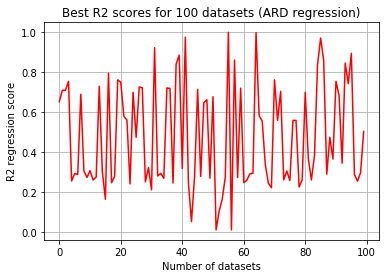

-------------x------------------x---------------
 
Mean R2 score for ElasticNet regressor: 0.48


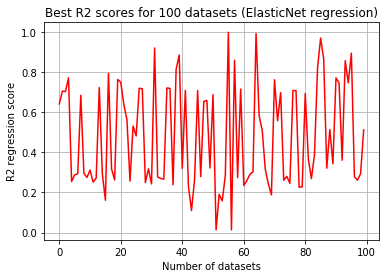

-------------x------------------x---------------
 
Mean R2 score for DecisionTree regressor: 0.68


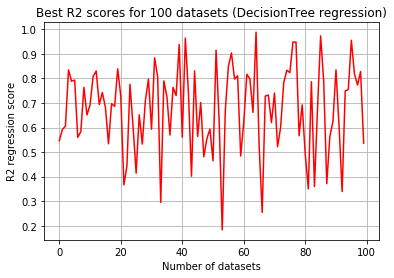

-------------x------------------x---------------
 
Mean R2 score for Adaboost regressor: 0.75


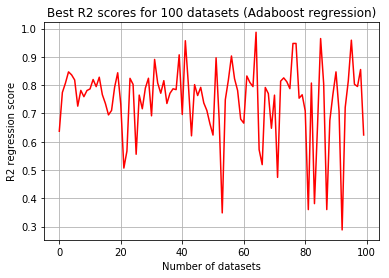

-------------x------------------x---------------
 
Mean R2 score for BayesianRidge regressor: 0.48


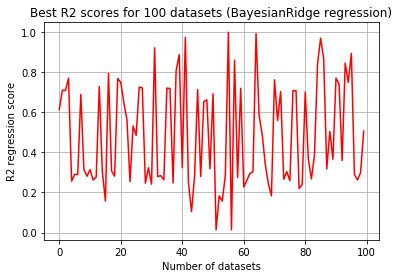

-------------x------------------x---------------
 
Mean R2 score for Huber regressor: 0.47


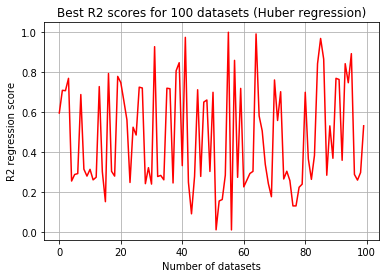

-------------x------------------x---------------
 
Mean R2 score for LarsCV regressor: 0.48


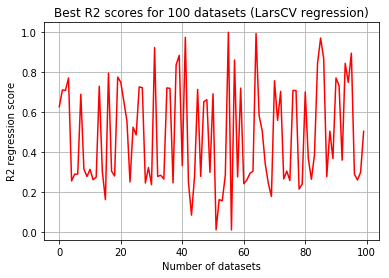

-------------x------------------x---------------
 
Mean R2 score for PassiveAggresive regressor: 0.44


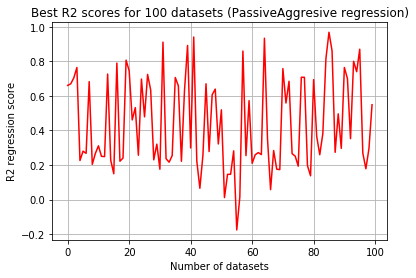

-------------x------------------x---------------
 
Mean R2 score for XGBoost regressor: 0.82


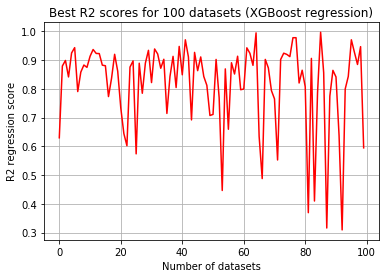

-------------x------------------x---------------
 
Mean R2 score for RANSAC regressor: 0.48


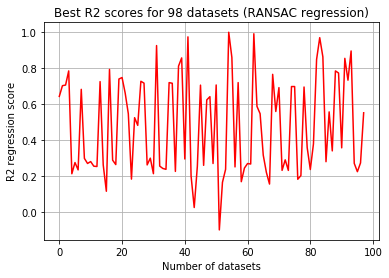

-------------x------------------x---------------
 
Mean R2 score for LinearRegression regressor: 0.48


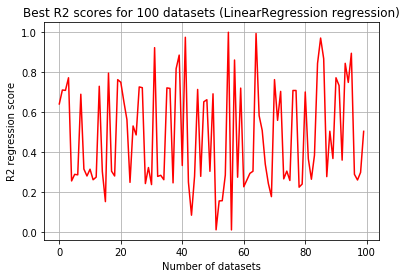

-------------x------------------x---------------
 
Mean R2 score for GradientBoosting regressor: 0.81


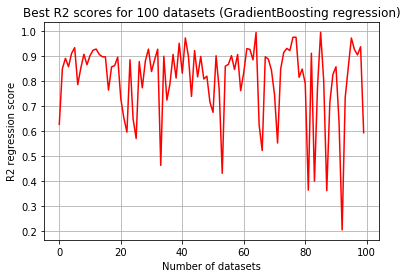

-------------x------------------x---------------
 
Mean R2 score for LinearSVR regressor: 0.48


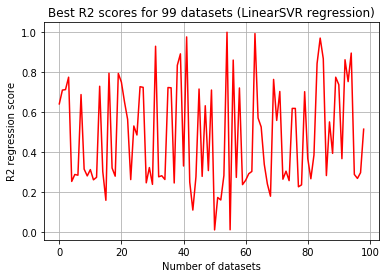

-------------x------------------x---------------
 
Mean R2 score for TheilSen regressor: 0.47


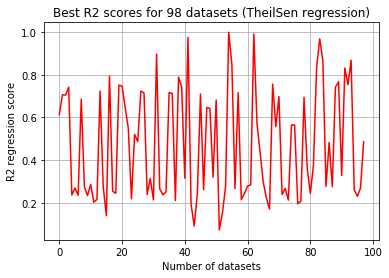

-------------x------------------x---------------
 
Mean R2 score for RandomForest regressor: 0.77


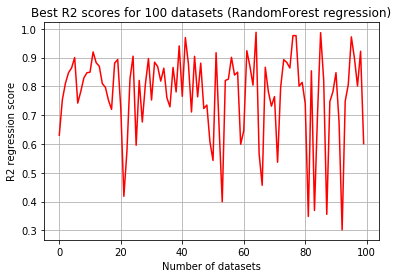

-------------x------------------x---------------
 
Mean R2 score for Lars regressor: 0.48


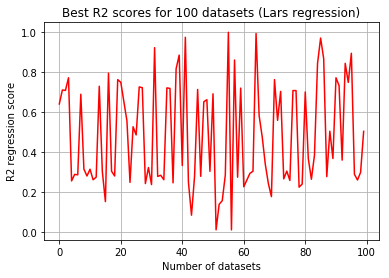

-------------x------------------x---------------
 
Mean R2 score for ElasticNetCV regressor: 0.48


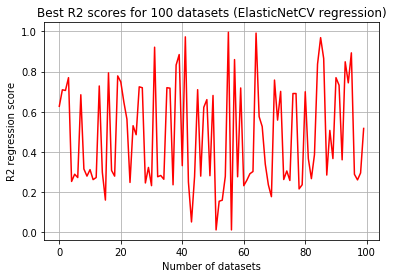

-------------x------------------x---------------
 
Mean R2 score for ExtraTree regressor: 0.68


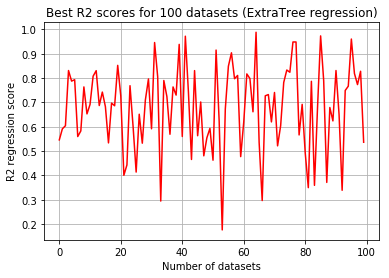

-------------x------------------x---------------
 
Mean R2 score for SGD regressor: 0.48


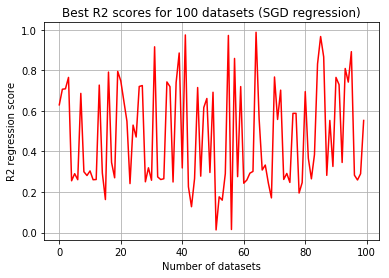

-------------x------------------x---------------
 
Mean R2 score for Bagging regressor: 0.77


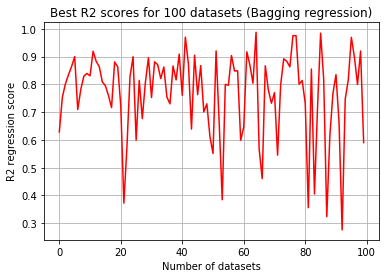

-------------x------------------x---------------
 
Mean R2 score for KNNeighbours regressor: 0.75


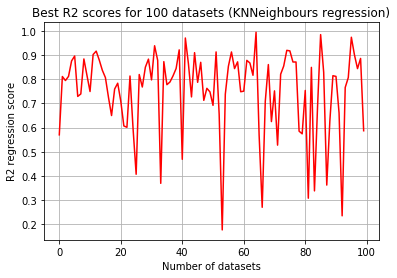

-------------x------------------x---------------
 


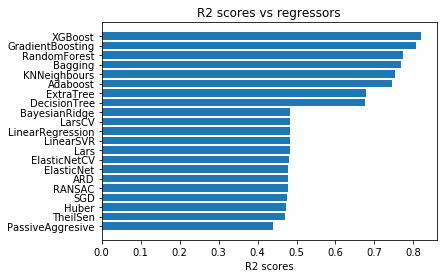

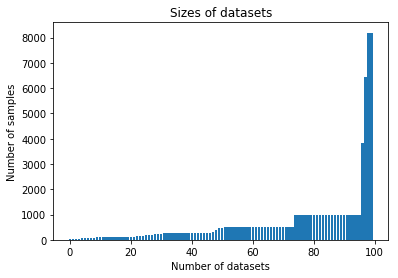

Total time taken: 17 seconds


In [14]:
import sys
import time
import pandas as pd
from matplotlib import pyplot as plt
import os
import numpy as np
import warnings


warnings.filterwarnings('ignore')

%matplotlib inline
start_time = time.time()

#folder_name = "filtered_results/"
folder_name = "100_datasets_results/"

clf_names_dir = os.listdir(folder_name)

clf_names = list()
clf_mean_r2 = list()
r2_dict = dict()
for clf in clf_names_dir:
    data_path = folder_name + clf
    files = [f for f in os.listdir(data_path)]
    r2_scores = list()
    for f_name in files:
        f_path = data_path + "/" + f_name
        df = pd.read_csv(f_path, sep="\t")
        rank_test_score = df[df["rank_test_score"] == 1]
        mean_test_score = rank_test_score["mean_test_score"]
        r2_scores.append(mean_test_score.iloc[0])
    clf_names.append(clf)
    mean_r2 = np.mean(r2_scores)
    clf_mean_r2.append(mean_r2)
    r2_dict[clf] = mean_r2 
    print("Mean R2 score for %s regressor: %0.2f" % (clf, mean_r2))

    plt.figure()
    plt.plot(r2_scores, color='r')
    plt.grid(True)
    plt.xlabel("Number of datasets")
    plt.ylabel("R2 regression score")
    plt.title(('Best R2 scores for %d datasets (%s regression)' % (len(files), clf)))
    plt.show()
    print("-------------x------------------x---------------")
    print(" ")

r2_dict = sorted(r2_dict.items(), key=lambda kv: kv[1])

cf = list()
r2 = list()

for item in r2_dict:
    cf.append(item[0])
    r2.append(item[1])

plt.figure()
y_pos = np.arange(len(cf))
plt.barh(y_pos, r2)
plt.yticks(y_pos, tuple(cf))
plt.xlabel('R2 scores')
plt.title('R2 scores vs regressors')
plt.show()

# fetch number of samples in each dataset

data_folder_name = "data_used/"

folder_dir = os.listdir(data_folder_name)

dataset_length = list()

for ds in folder_dir:
    ds_path = data_folder_name + ds
    df = pd.read_csv(ds_path, sep="\t")
    dataset_length.append(len(df))

plt.figure()
y_pos = np.arange(len(dataset_length))
plt.bar(y_pos, sorted(dataset_length))
plt.xlabel('Number of datasets')
plt.ylabel('Number of samples')
plt.title('Sizes of datasets')
plt.show()

end_time = time.time()
print('Total time taken: %d seconds' % int(end_time - start_time))